In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import nltk
import plotly.express as px
import re
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline 

In [4]:
df = pd.read_csv("../Dataset/all-data.csv", encoding="ISO-8859-1", header=None)

In [98]:
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [99]:
print(f"There are {len(df[0])} rows in the dataset")

There are 4846 rows in the dataset


In [100]:
df.describe()

,0,1
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [101]:
df = df.set_axis(['sentiment', 'news'], axis=1, inplace=False)

In [102]:
df.head()

,sentiment,news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


# Duplicates count

In [103]:
print('No. of duplicates in the dataset: {}'.format(sum(df.duplicated())))

No. of duplicates in the dataset: 6


# Null vals

In [104]:
print('We have {} NaN/Null values in the dataset'.format(df.isnull().values.sum()))

We have 0 NaN/Null values in the dataset


# Class Count

In [105]:
df.sentiment.value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

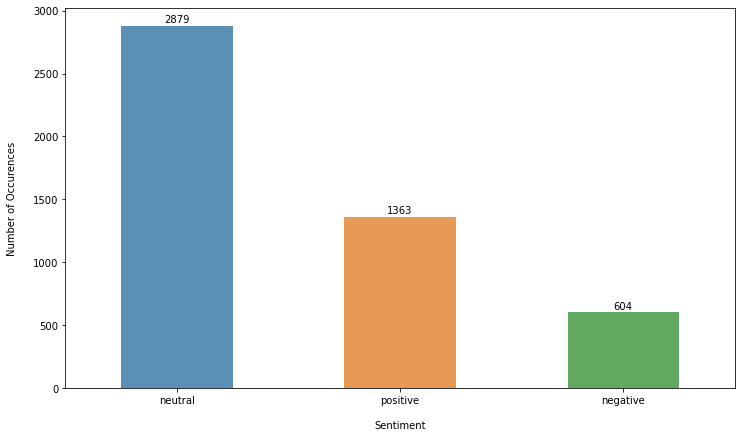

In [106]:
gender = df['sentiment'].value_counts()
plt.figure(figsize=(12, 7))
ax = gender.plot(kind='bar', rot=0, color=["#5B90B4", "#E79A56", "#61A861"])
ax.set_xlabel('\nSentiment')
ax.set_ylabel('Number of Occurences\n')

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [107]:
fig = px.pie(df, names='sentiment', title ='Different sentiments of headlines', width=500, height=500)
fig.show()

# Revised dataset

In [108]:
for index, row in enumerate(df.news):
    df["news"][index] = re.sub(r'[^\w\s]', '', row) # punctuation removal

df['news_len'] = df['news'].astype(str).apply(len)
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))

In [109]:
df.head()

,sentiment,news,news_len,word_count
0,neutral,According to Gran the company has no plans to...,124,22
1,neutral,Technopolis plans to develop in stages an area...,187,29
2,negative,The international electronic industry company ...,225,33
3,positive,With the new production plant the company woul...,205,32
4,positive,According to the company s updated strategy fo...,192,35


# Distribution positive sentiment

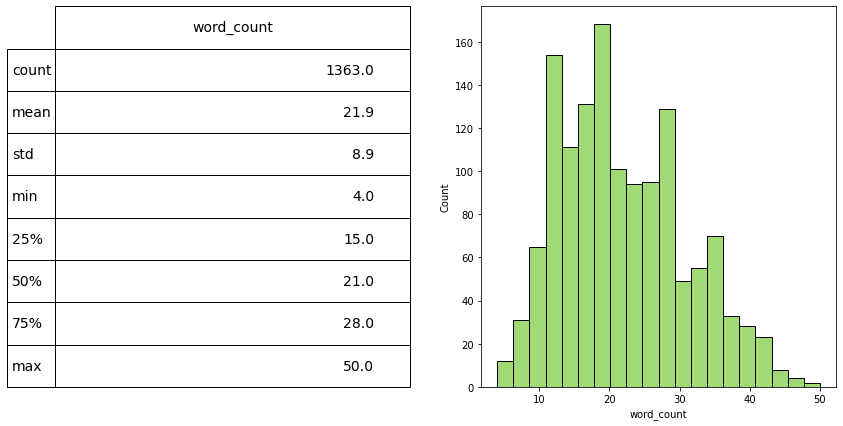

In [110]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='positive']['word_count'], ax=ax1,color='#82CD47')
describe = df["word_count"][df["sentiment"]=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
#fig.suptitle('Distribution of text length for positive sentiment headlines.', fontsize=16)

plt.show()

# Distribution negative sentiment

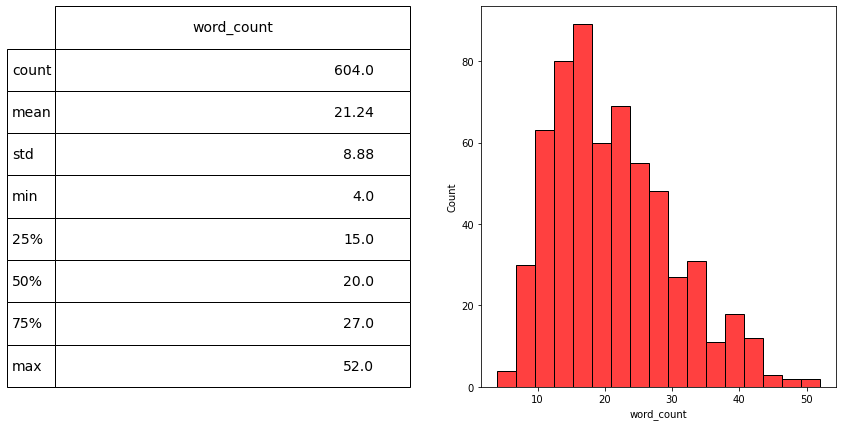

In [111]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='negative']['word_count'], ax=ax1,color='#FF0000')
describe = df["word_count"][df["sentiment"]=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
#fig.suptitle('Distribution of text length for negative sentiment headlines.', fontsize=16)

plt.show()

# Distribution neutral sentiment

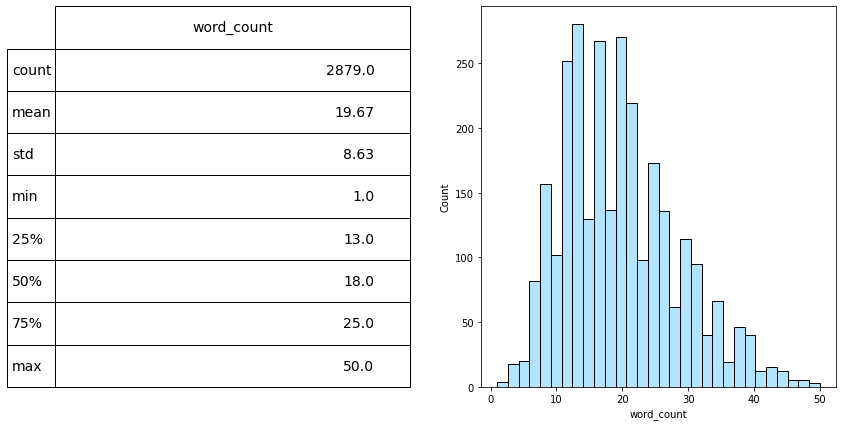

In [112]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='neutral']['word_count'], ax=ax1,color='#9ADCFF')
describe = df["word_count"][df["sentiment"]=='neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
#fig.suptitle('Distribution of text length for neutral sentiment headlines.', fontsize=16)

plt.show()

# Word Cloud

In [113]:
def wordcount_gen(df, category):
    combined_tweets = " ".join([tweet for tweet in df[df.sentiment==category]['news']])                        
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    #plt.title('{} Sentiment Words\n'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Text Cloud class Positive

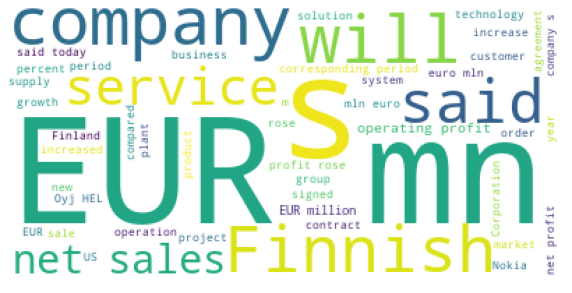

In [114]:
wordcount_gen(df, 'positive')

# Text cloud class Negative

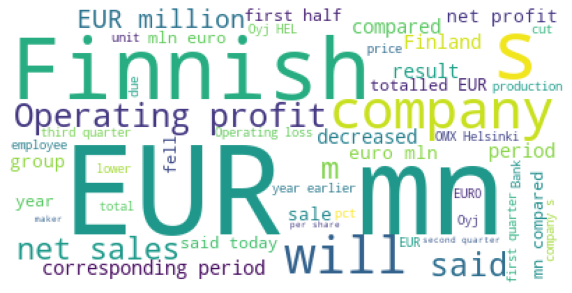

In [115]:
wordcount_gen(df, 'negative')

# Text cloud class Neutral

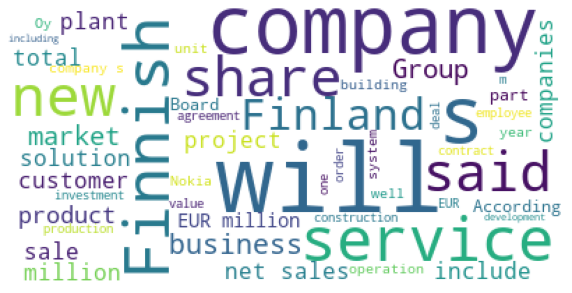

In [116]:
wordcount_gen(df, 'neutral')

# Top words

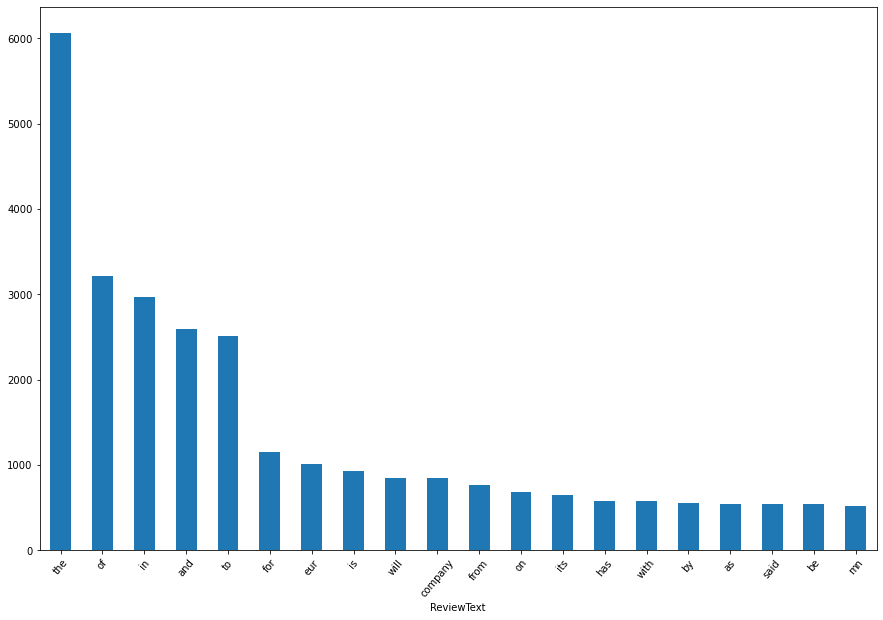

In [117]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(15,10))
common_words = get_top_n_words(df['news'], 20)

df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar')
plt.xticks(rotation=50)
plt.show()

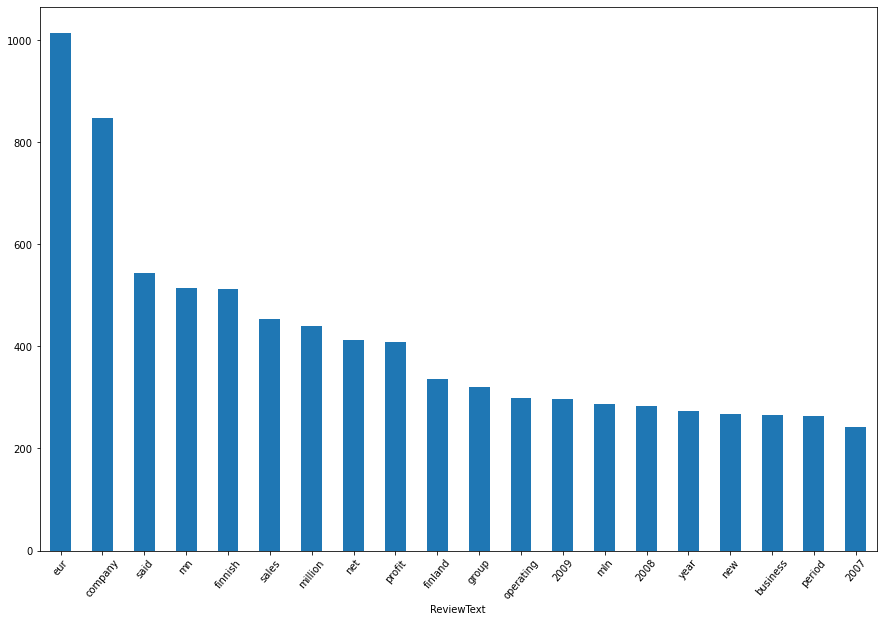

,ReviewText,count
0,eur,1015
1,company,848
2,said,544
3,mn,515
4,finnish,512
5,sales,453
6,million,440
7,net,412
8,profit,409
9,finland,337


In [118]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(15,10))
common_words = get_top_n_words(df['news'], 20)

df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar')
plt.xticks(rotation=50)
plt.show()
df2

# Top Bigrams

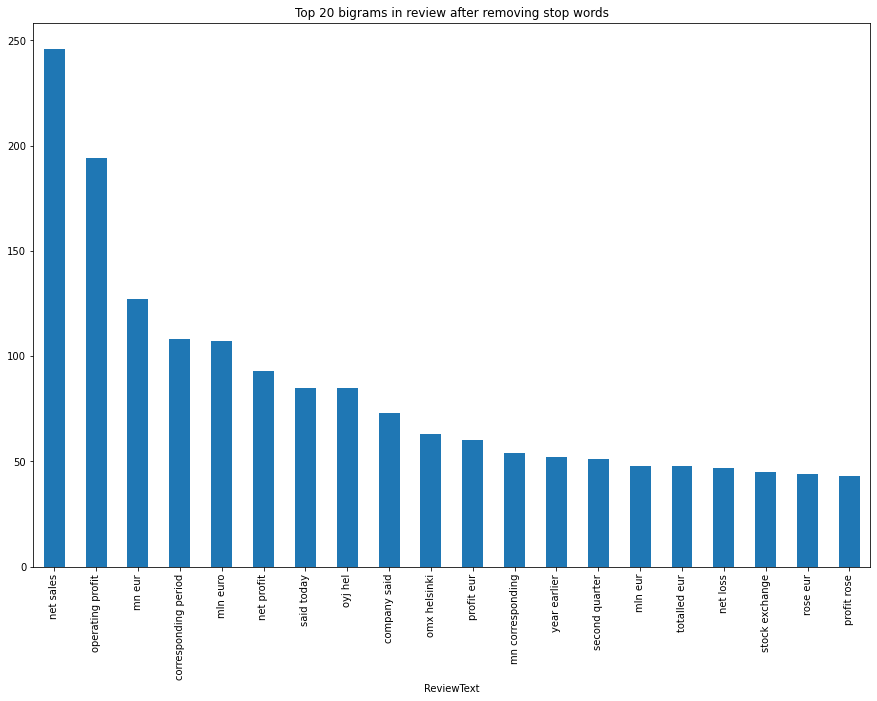

,ReviewText,count
0,net sales,246
1,operating profit,194
2,mn eur,127
3,corresponding period,108
4,mln euro,107
5,net profit,93
6,oyj hel,85
7,said today,85
8,company said,73
9,omx helsinki,63


In [119]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(15,10))
common_words = get_top_n_bigram(df['news'], 20)

df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')
plt.xticks(rotation=90)
plt.show()
df4

# Top Trigrams

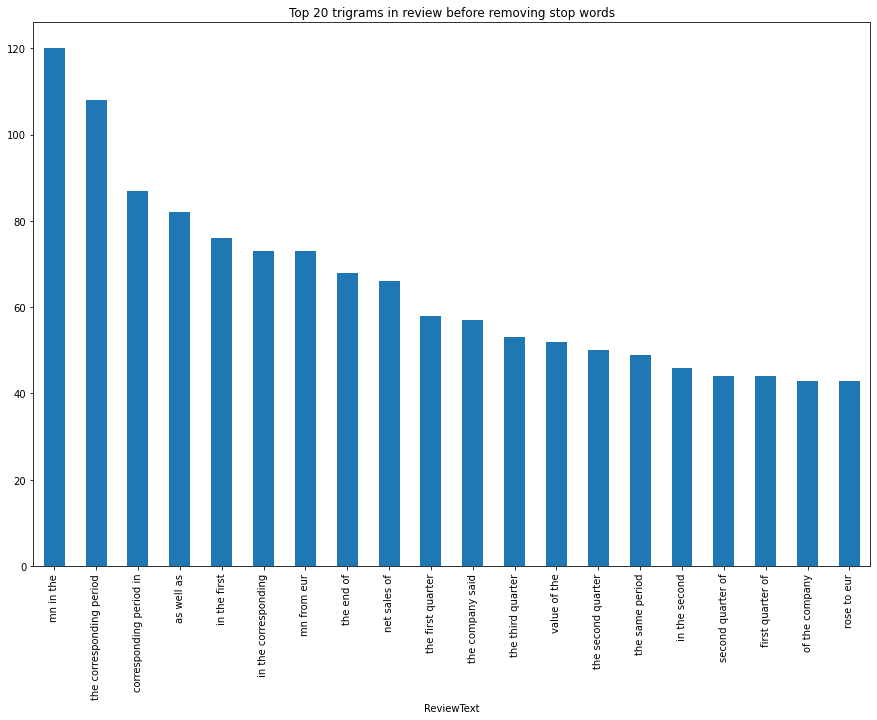

In [120]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(15,10))
common_words = get_top_n_trigram(df['news'], 20)

df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')
plt.xticks(rotation=90)
plt.show()

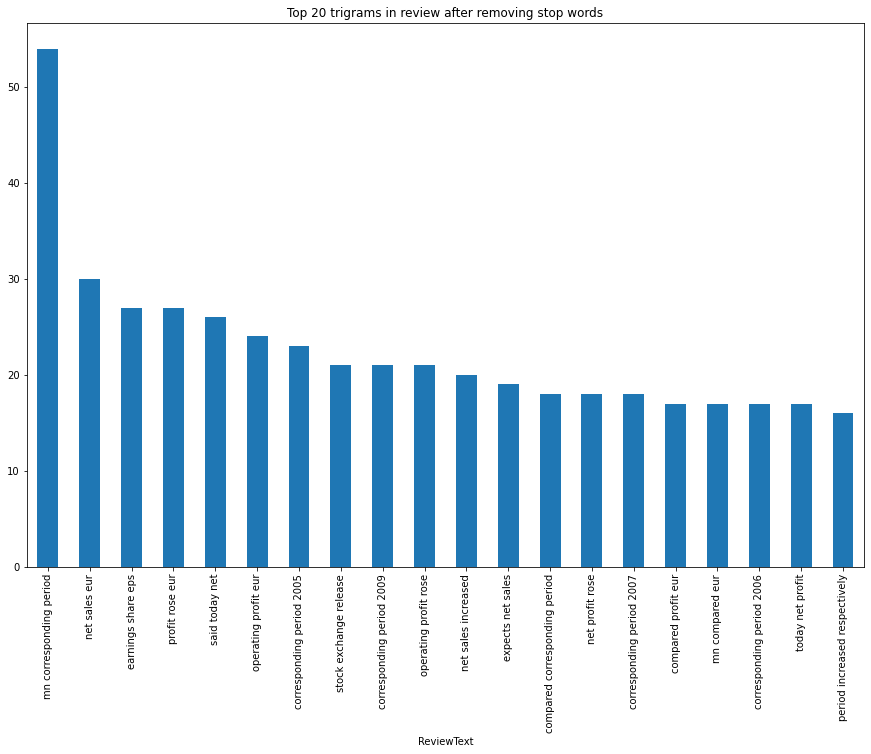

,ReviewText,count
0,mn corresponding period,54
1,net sales eur,30
2,profit rose eur,27
3,earnings share eps,27
4,said today net,26
5,operating profit eur,24
6,corresponding period 2005,23
7,operating profit rose,21
8,corresponding period 2009,21
9,stock exchange release,21


In [121]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(15,10))
common_words = get_top_n_trigram(df['news'], 20)

df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')
plt.xticks(rotation=90)
plt.show()
df5

# DATA PREPARATION

1. Special Characters --> re.sub('[^A-Za-z0-9]+', '', mystring)
2. stopwords ?? #idt to remove them.
3. 's cases row = row.replace("'s", "") V
5. change 'mn' & 'm' & 'million' with 'mln' V
6. shouldn't delete '.' ('%' ??) V
7. DELETE 'Oyj' 'Oy' 'HEL' 'pct' V
8. DELETE .[0-9] V
9. Euro, eur to EUR V
10. IF there is EUR[0-9] --> EUR [0-9] V
11. lemmatization of words V


In [122]:
regex = r"(?i)(?<=\d)(?=[a-z])|(?<=[a-z])(?=\d)"

for i, row in enumerate(df.news):
    df["news"][i] = re.sub('[^A-Za-z0-9-.]+', ' ', df["news"][i]) # To take only alfanumerics char and "."
    df["news"][i] = re.sub('\.\d+', '', df["news"][i]) #To delete decimals 
    df["news"][i] = re.sub(regex, ' ', df["news"][i]) # To split "EUR63" to "EUR 63"

df    

,sentiment,news,news_len,word_count
0,neutral,According to Gran the company has no plans to ...,124,22
1,neutral,Technopolis plans to develop in stages an area...,187,29
2,negative,The international electronic industry company ...,225,33
3,positive,With the new production plant the company woul...,205,32
4,positive,According to the company s updated strategy fo...,192,35
...,...,...,...,...
4841,negative,LONDON MarketWatch Share prices ended lower in...,141,24
4842,neutral,Rinkuskiai s beer sales fell by 65 per cent to...,140,27
4843,negative,Operating profit fell to EUR 354 mn from EUR 6...,103,21
4844,negative,Net sales of the Paper segment decreased to EU...,219,42


### Multiple replacing

In [123]:
dic = { "Oyj": "",  "Oy": "",  "HEL": "", "mln": " m ",  " mn ": " m " ,
     "million": " m ", " s ": "", " S ": "", "Euro": "EUR", "eur": "EUR",
      "EURo": "EUR", "EURO": "EUR",  "pct": "" } # Dict with words (needs for multiple substitutions)

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

In [124]:
for i, row in enumerate (df.news):
    df["news"][i] = replace_all(df["news"][i] , dic)

### Lemmatization (Text Blob)

In [125]:
# Define function to lemmatize each word with its POS tag
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

In [126]:
for i, row in enumerate (df.news):
    df["news"][i] = lemmatize_with_postag(df["news"][i])
df

,sentiment,news,news_len,word_count
0,neutral,According to Gran the company have no plan to ...,124,22
1,neutral,Technopolis plan to develop in stage an area o...,187,29
2,negative,The international electronic industry company ...,225,33
3,positive,With the new production plant the company woul...,205,32
4,positive,According to the companyupdated strategy for t...,192,35
...,...,...,...,...
4841,negative,LONDON MarketWatch Share price end lower in Lo...,141,24
4842,neutral,Rinkuskiaibeer sale fell by 65 per cent to 416...,140,27
4843,negative,Operating profit fell to EUR 354 m from EUR 68...,103,21
4844,negative,Net sale of the Paper segment decrease to EUR ...,219,42


## WordCloud Update

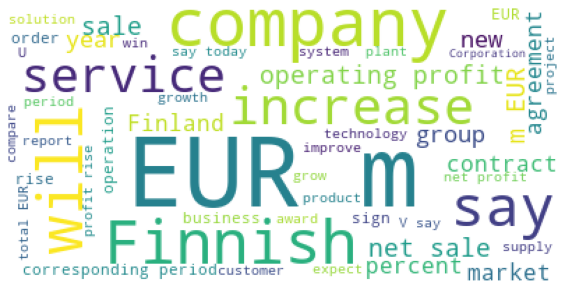

In [127]:
wordcount_gen(df, 'positive')

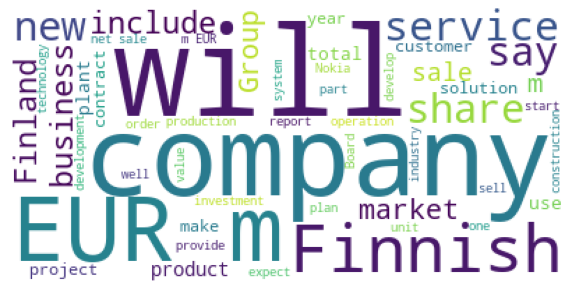

In [128]:
wordcount_gen(df, 'neutral')

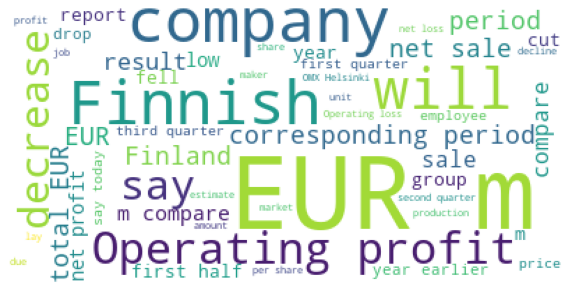

In [129]:
wordcount_gen(df, 'negative')

## Duplicates removal

In [130]:
df = df.drop_duplicates()
print('No. of duplicates in the dataset: {}'.format(sum(df.duplicated())))

No. of duplicates in the dataset: 0


### New datafram for future analysis

In [131]:
df.to_csv("../Dataset/new_data.csv", index=False)